# House Price Data Analysis

The main aim of this project is to analyse how various categorical and numerical features affect house prices.

Dataset link: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

### Importing the dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.pandas.set_option('display.max_columns',None)

In [2]:
dataset=pd.read_csv('dataset.csv')

### First glance at data

In [3]:
print(dataset.shape)

(1460, 81)


In [4]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Analysis

Now, the following will be analyzed and the needful done:

1. Missing values in categorical features
2. Missing values in numerical features
3. Outliers in numerical features
4. Relationship between independent features and dependent feature (SalePrice)

In [5]:
features_with_na = [features for features in dataset.columns if dataset[features].isnull().sum() > 1]

for feature in features_with_na:
    print('{}: {}% missing values'.format(feature, np.round(dataset[feature].isnull().mean() * 100, 1)))

LotFrontage: 17.7% missing values
Alley: 93.8% missing values
MasVnrType: 59.7% missing values
MasVnrArea: 0.5% missing values
BsmtQual: 2.5% missing values
BsmtCond: 2.5% missing values
BsmtExposure: 2.6% missing values
BsmtFinType1: 2.5% missing values
BsmtFinType2: 2.6% missing values
FireplaceQu: 47.3% missing values
GarageType: 5.5% missing values
GarageYrBlt: 5.5% missing values
GarageFinish: 5.5% missing values
GarageQual: 5.5% missing values
GarageCond: 5.5% missing values
PoolQC: 99.5% missing values
Fence: 80.8% missing values
MiscFeature: 96.3% missing values


In [6]:
len(features_with_na)

18

Since they are many missing values, we need to plot graphs between these features and target variable to decide how to deal with them.

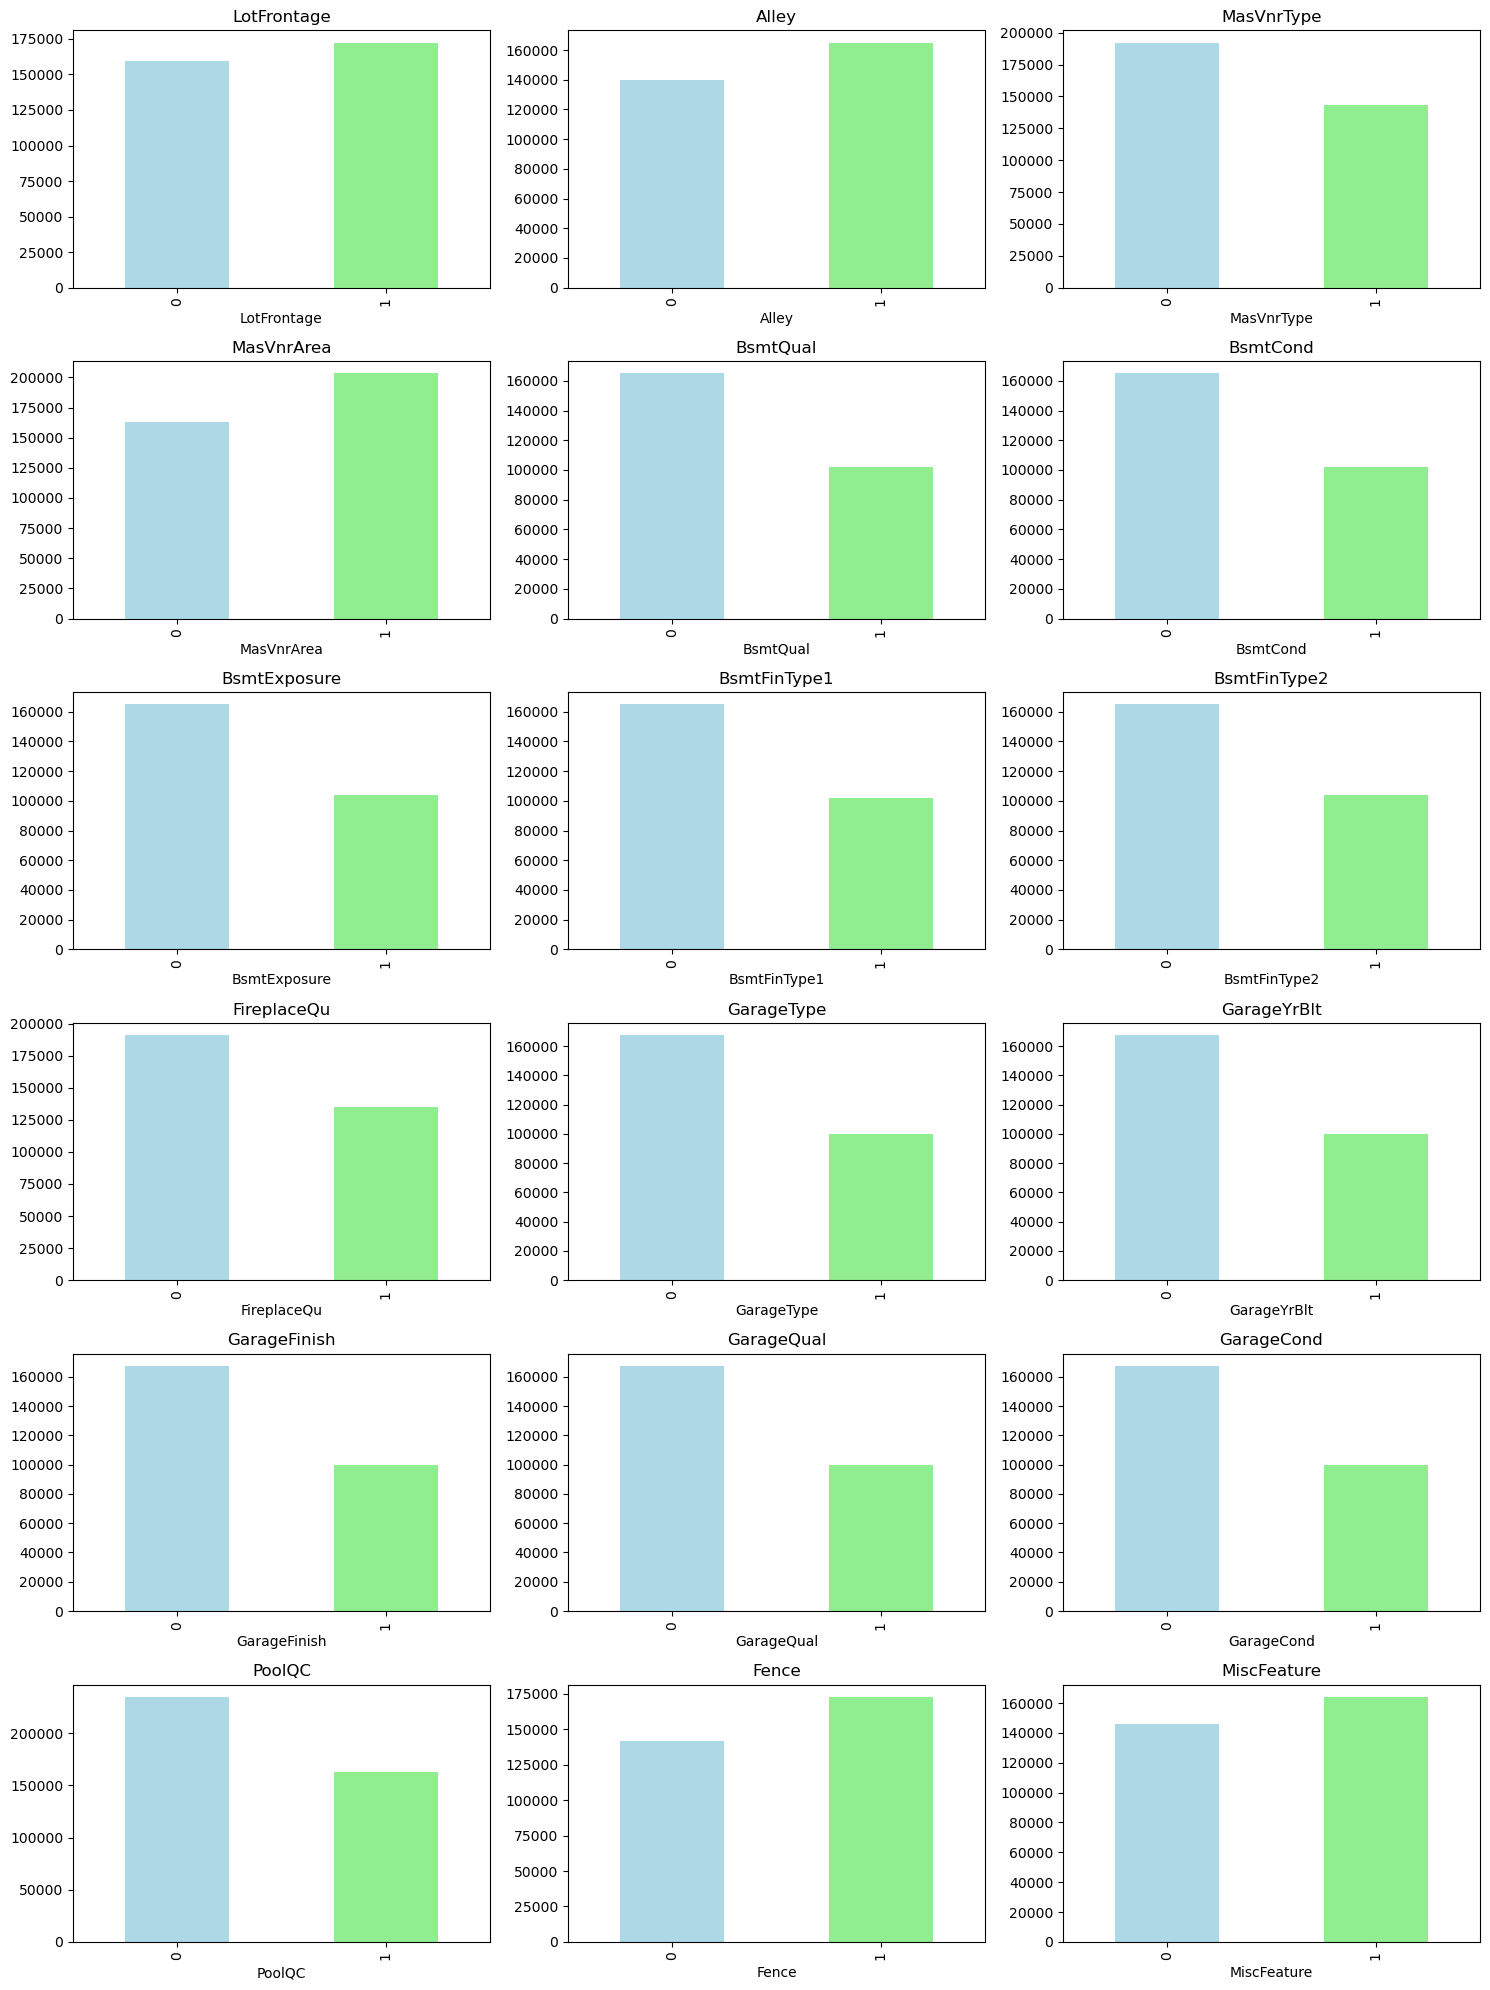

In [7]:
fig, axes = plt.subplots(6, 3, figsize=(15, 20))

axes = axes.flatten()

colors = {0: 'lightblue', 1: 'lightgreen'}

for i, feature in enumerate(features_with_na):
    data = dataset.copy()
    data[feature] = np.where(data[feature].isnull(), 1, 0)

    grouped_data = data.groupby(feature)['SalePrice'].median()
    
    bars = grouped_data.plot.bar(ax = axes[i], color = [colors[val] for val in grouped_data.index])
    axes[i].set_title(feature)

plt.tight_layout()
plt.show()

The relation between features with missing values and the dependent feature is clearly visible. We need to replace these missing values with something meaningful instead of dropping the feature altogether.

### 1. Missing values in categorical features

In [8]:
# Replacing missing values in categorical features

categorical_nan = [feature for feature in dataset.columns if dataset[feature].isnull().sum() > 1 and dataset[feature].dtypes == 'O']

def replace_cat_feature(dataset,features):
    data=dataset.copy()
    data[features]=data[features].fillna('Missing')
    return data

dataset = replace_cat_feature(dataset,categorical_nan)

In [9]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,Missing,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,Missing,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000


All missing values in categorical columns have been replaced with 'Missing'.

### 2. Missing values in numerical features

In [10]:
# Replacing missing values in numerical features

numerical_nan = [feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes != 'O']

for feature in numerical_nan:
    median_value = dataset[feature].median()
    
    # A new feature should be created to capture rows with missing values
    dataset[feature + 'nan'] = np.where(dataset[feature].isnull(), 1, 0)
    dataset[feature].fillna(median_value, inplace=True)

C:\Users\91706\AppData\Local\Temp\ipykernel_11420\3885328431.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[feature].fillna(median_value, inplace=True)
C:\Users\91706\AppData\Local\Temp\ipykernel_11420\3885328431.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

In [11]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,Missing,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,Missing,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000,0,0,0


All missing values in numerical columns have been replaced with median of the column.

In [12]:
features_with_na = [features for features in dataset.columns if dataset[features].isnull().sum() > 1]

for feature in features_with_na:
    print('{}: {}% missing values'.format(feature, np.round(dataset[feature].isnull().mean() * 100, 1)))

In [13]:
# No output! Hence, all missing values have been dealt with.

### 3. Outliers in numerical features

There are two types of numerical variables: discrete and continuous. Hence, continuous variables will be studied for outliers.

In [14]:
# To find discrete variables, a threshold distinct values count has been taken as 25.

numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

year_features = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

discrete_features = [feature for feature in numerical_features if len(dataset[feature].unique()) < 25 and feature not in year_features + ['Id']]

continuous_features = [feature for feature in numerical_features if feature not in discrete_features + year_features + ['Id']]
print("Number of continuous features is {}.".format(len(continuous_features)))

Number of continuous features is 16.


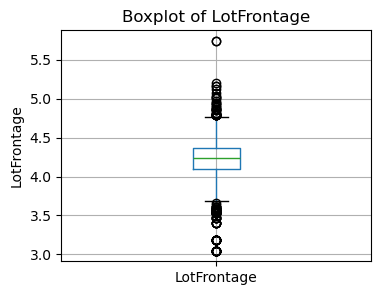

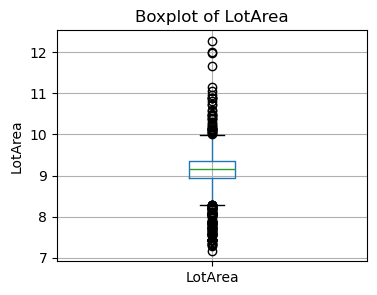

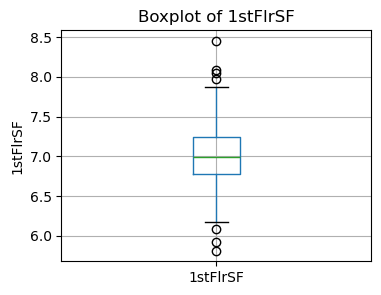

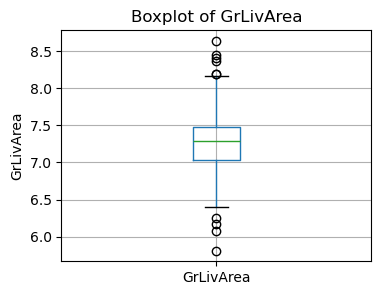

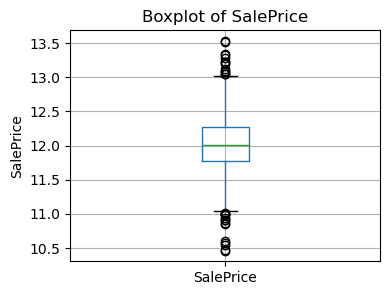

In [15]:
# Next, outliers have been assumed to be in log normal distributions and has their normal distributions have been box-plotted.

for feature in continuous_features:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])

        plt.figure(figsize=(4, 3))
        
        data.boxplot(column = feature)
        plt.ylabel(feature)
        plt.title(f'Boxplot of {feature}')
        plt.show()

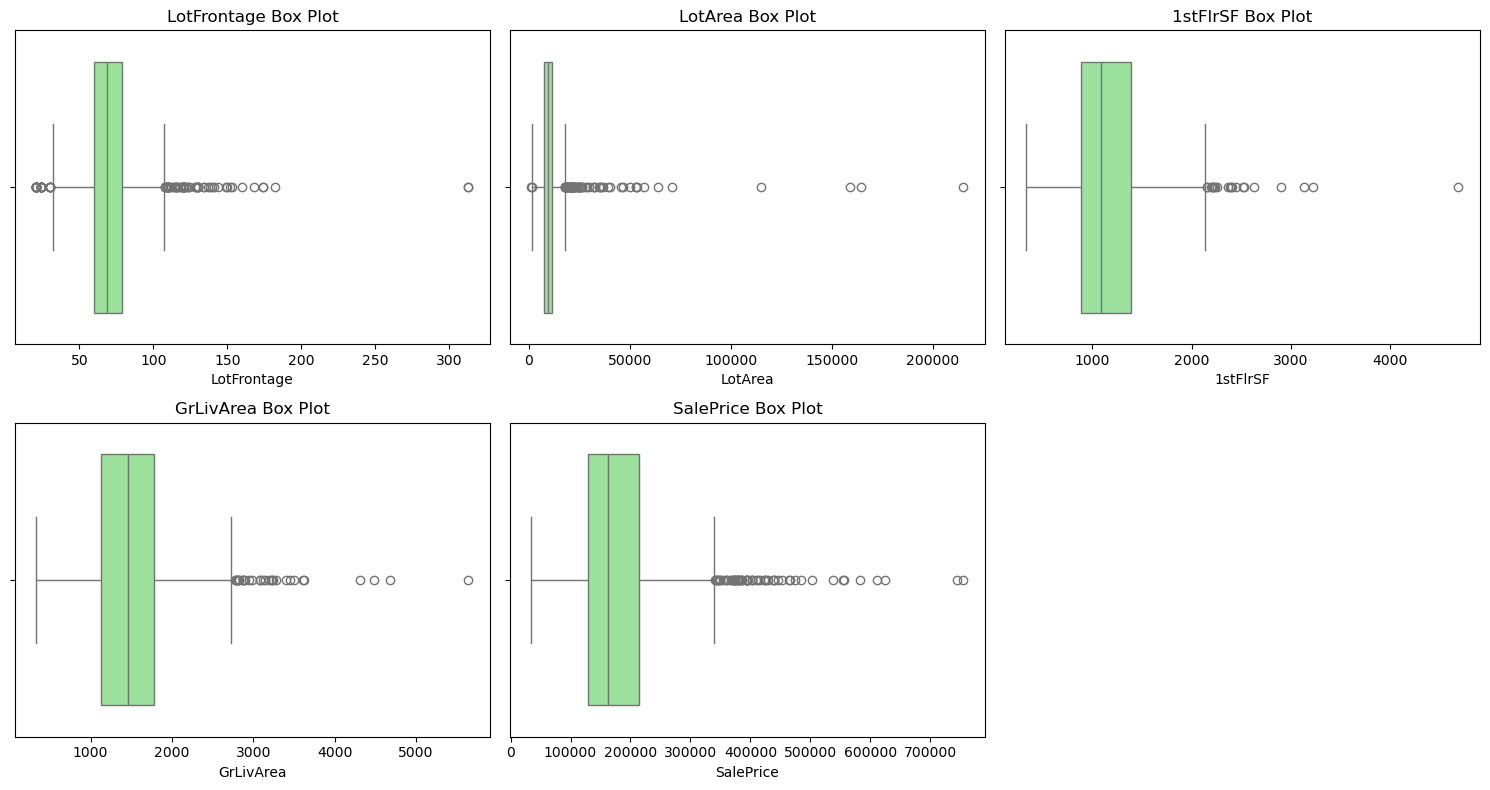

In [16]:
# Visualizing these features with box plots
features = ['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

plt.figure(figsize=(15, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=dataset[feature], color='lightgreen')
    plt.title(f'{feature} Box Plot')

plt.tight_layout()
plt.show()


To deal with outliers in data trend analysis like this, we can use Winsorization (capping). This works best to limit the influence of outliers witout losing/deleting any datapoints altogether. It caps the outliers of the specified features (i.e., replaces extreme values that are too high or too low with values closer to the median).
1. Any value below the 1st percentile will be replaced with the 1st percentile value.
2. Any value above the 99th percentile will be replaced with the 99th percentile value.

In [17]:
def cap_outliers(df, columns):
    for col in columns:
        
        # Calculating the 1st percentile and the 99th percentile value for each feature.
        low = df[col].quantile(0.01)
        high = df[col].quantile(0.99)
        
        # Replacing values lower than the 1st percentile and higher than the 99th percentile.
        df[col] = df[col].clip(lower=low, upper=high)
    return df

# Applying to the variables
dataset = cap_outliers(dataset, ['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice'])


### 4. Relationship between independent features and dependent feature (SalePrice)

#### Q1. What are the key statistics of the dataset?

In [18]:
dataset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.459692,10063.006575,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1158.294452,346.992466,5.844521,1510.289658,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.589041,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,179926.416233,0.177397,0.005479,0.055479
std,421.610009,42.300571,19.581352,5062.299090,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,363.802701,436.528436,48.623081,495.148927,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,23.997022,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,74052.658892,0.382135,0.073846,0.228992
min,1.000000,20.000000,21.000000,1680.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,520.000000,0.000000,0.000000,692.180000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,61815.970000,0.000000,0.000000,0.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000,0.000000,0.000000,0.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000,0.000000,0.000000,0.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000,0.000000,0.000000,0.000000
max,1460.000000,190.000000,137.410000,37567.640000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,2219.460000,2065.000000,572.000000,3123.480000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,442567.010000,1.000000,1.000000,1.000000


#### Q2. What is the distribution of the target variable, SalePrice?

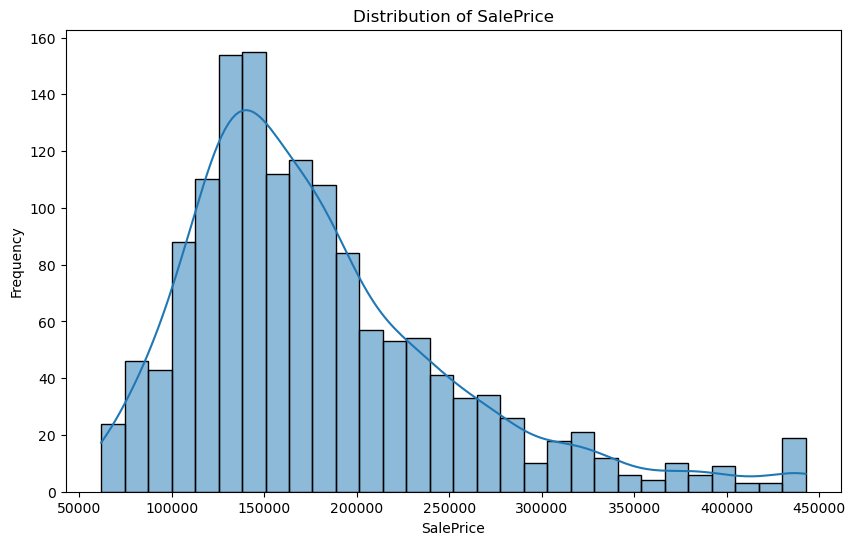

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(dataset['SalePrice'], kde=True, bins=30)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

This right-skewed distribution of SalePrice is common in real estate due to most homes being moderately priced, while a few high-end properties drive up prices. This reflects market realities like income inequality, luxury features, and prime locations.
Log transformation can help in making the distribution more normal for visualization.

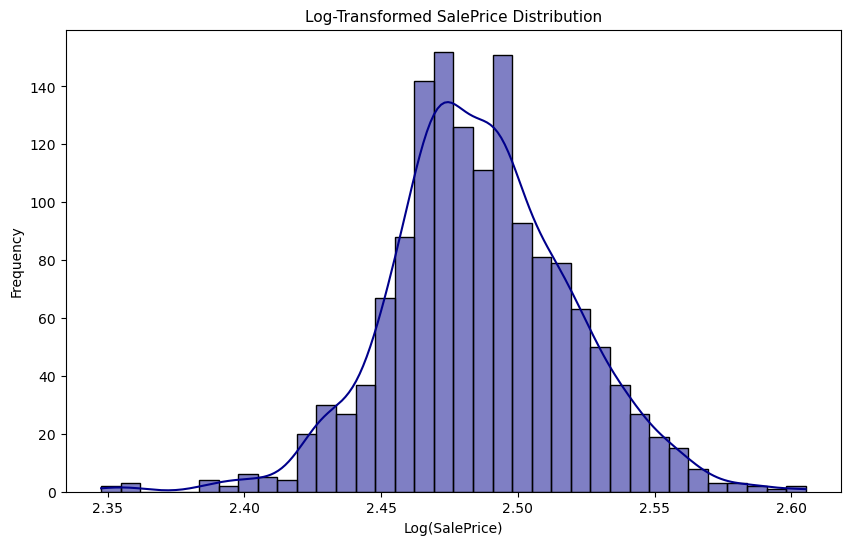

In [20]:
data['LogSalePrice'] = np.log(data['SalePrice'])

# Plotting histogram of log-transformed SalePrice
plt.figure(figsize=(10, 6))
sns.histplot(data['LogSalePrice'], kde=True, color='darkblue')
plt.title('Log-Transformed SalePrice Distribution', fontsize=11)
plt.xlabel('Log(SalePrice)')
plt.ylabel('Frequency')
plt.show()

#### Q3. How does LotArea affect SalePrice?

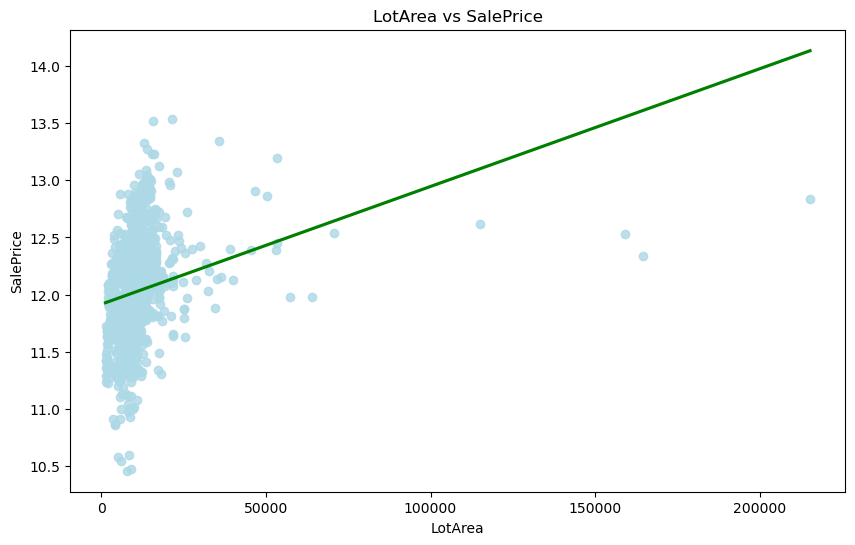

In [21]:
plt.figure(figsize=(10, 6))
sns.regplot(x='LotArea', y='SalePrice', data=data, scatter_kws={'color':'lightblue'}, line_kws={'color':'green'}, ci=None)
plt.title('LotArea vs SalePrice')
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.show()

This plot suggests a positive linear relationship between the property area and the sale price.

#### Q4. What is the distribution of houses sold per year (YrSold)?

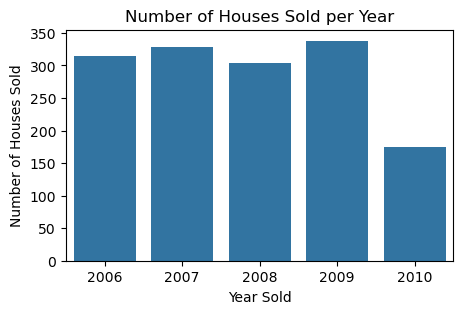

In [22]:
plt.figure(figsize=(5, 3))
sns.countplot(x='YrSold', data=dataset)
plt.title('Number of Houses Sold per Year')
plt.xlabel('Year Sold')
plt.ylabel('Number of Houses Sold')
plt.show()

This shows the distribution of house sales over the years. It can be observed that certain years had significantly more or fewer sales. The steep decline in 2010 could be due to a number of factors including market saturation or inconsistencies in the data itself.

#### Q5. How does the Neighborhood affect house prices?

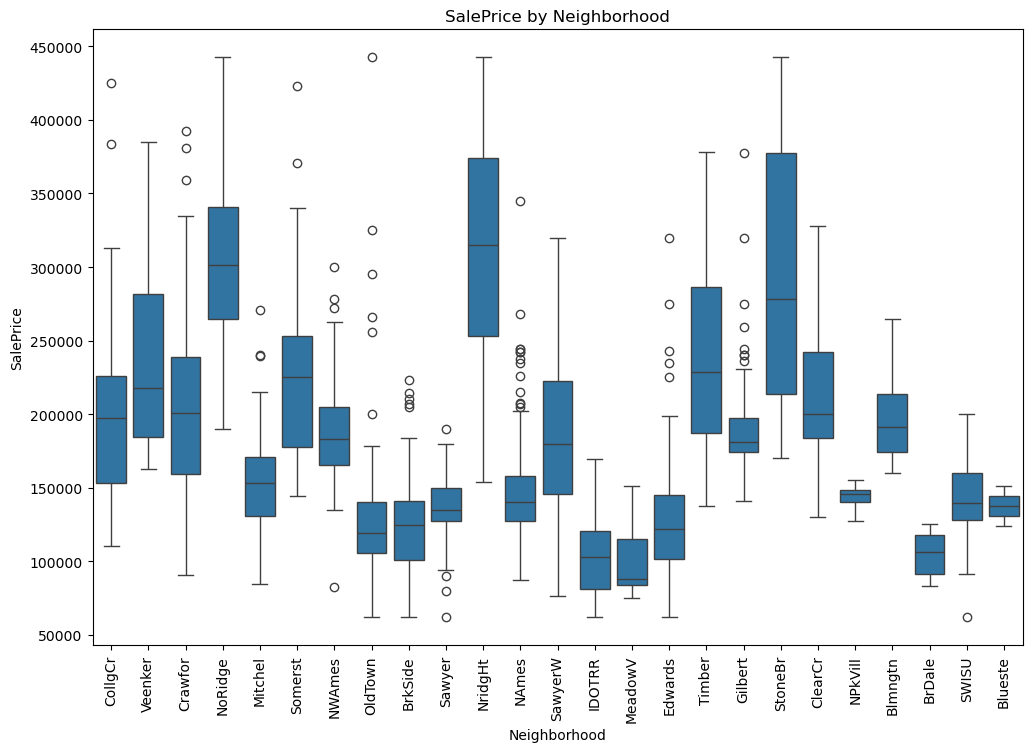

In [23]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Neighborhood', y='SalePrice', data=dataset)
plt.xticks(rotation=90)
plt.title('SalePrice by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('SalePrice')
plt.show()

#### Q6. What is the relationship between the number of bedrooms (BedroomAbvGr) and SalePrice?

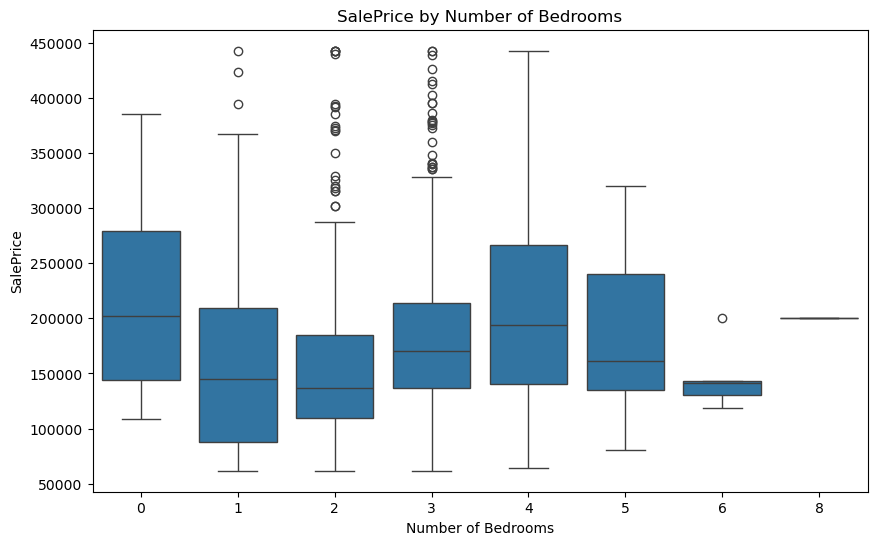

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='BedroomAbvGr', y='SalePrice', data=dataset)
plt.title('SalePrice by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('SalePrice')
plt.show()

It can be observed that more bedrooms lead to higher property prices and a diminishing return after a certain number of bedrooms.
The diminishing return on price after 4 bedrooms reflects a balance between functionality and buyer demand. While more bedrooms generally increase the value of a home, beyond 4, they offer diminishing utility for most buyers, who don't have very large families and prioritize other features.

#### Q7. What is the effect of YearBuilt on SalePrice?

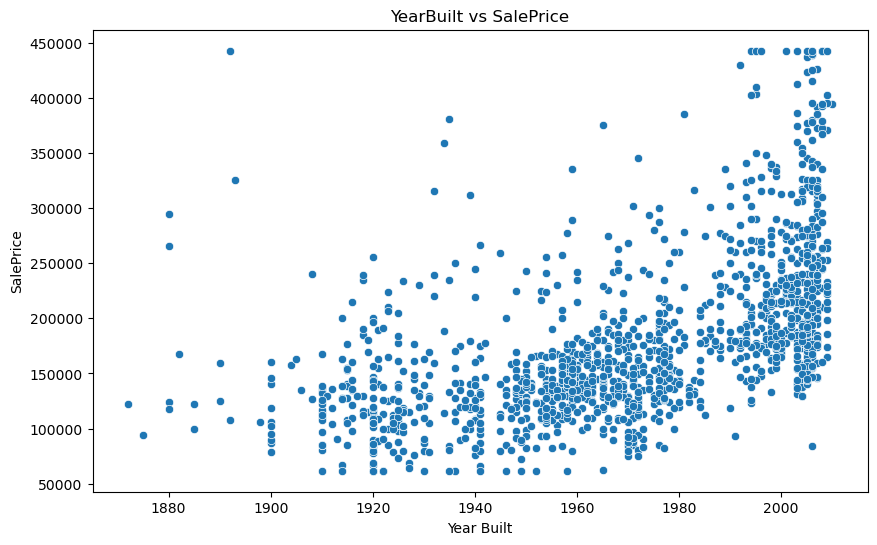

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='YearBuilt', y='SalePrice', data=dataset)
plt.title('YearBuilt vs SalePrice')
plt.xlabel('Year Built')
plt.ylabel('SalePrice')
plt.show()

This scatter plot suggets that newer houses tend to have higher prices compared to older houses and that the rise is about exponential.

#### Q8. What is the relationship between OverallQual (overall quality) and SalePrice?

C:\Users\91706\AppData\Local\Temp\ipykernel_11420\1959829304.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='OverallQual', y='SalePrice', data=dataset, palette='cool')


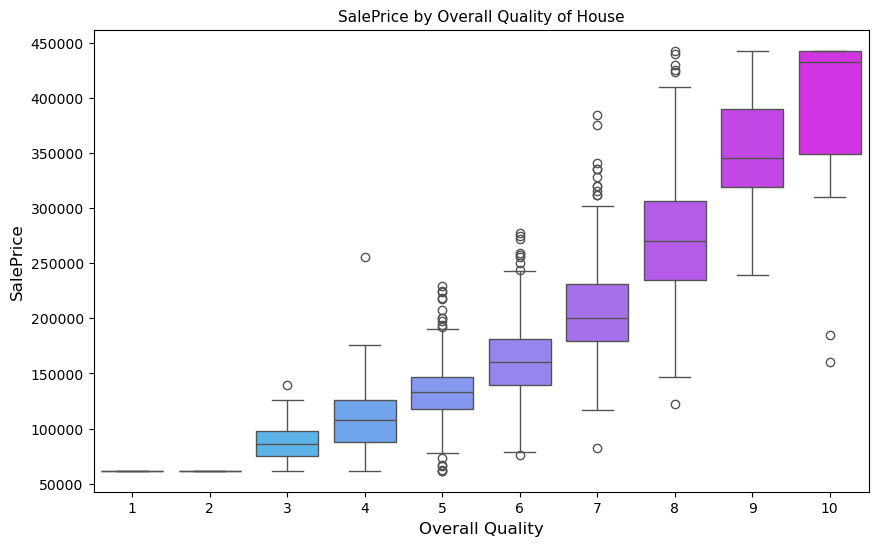

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=dataset, palette='cool')
plt.title('SalePrice by Overall Quality of House', fontsize=11)
plt.xlabel('Overall Quality', fontsize=12)
plt.ylabel('SalePrice', fontsize=12)
plt.show()

A strong positive correlation is observed, indicating that houses with higher quality materials and construction tend to be priced significantly higher.

#### Q9. Does the type of dwelling (MSSubClass) impact SalePrice?

C:\Users\91706\AppData\Local\Temp\ipykernel_11420\615641007.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='MSSubClass', y='SalePrice', data=dataset, palette='Greens')


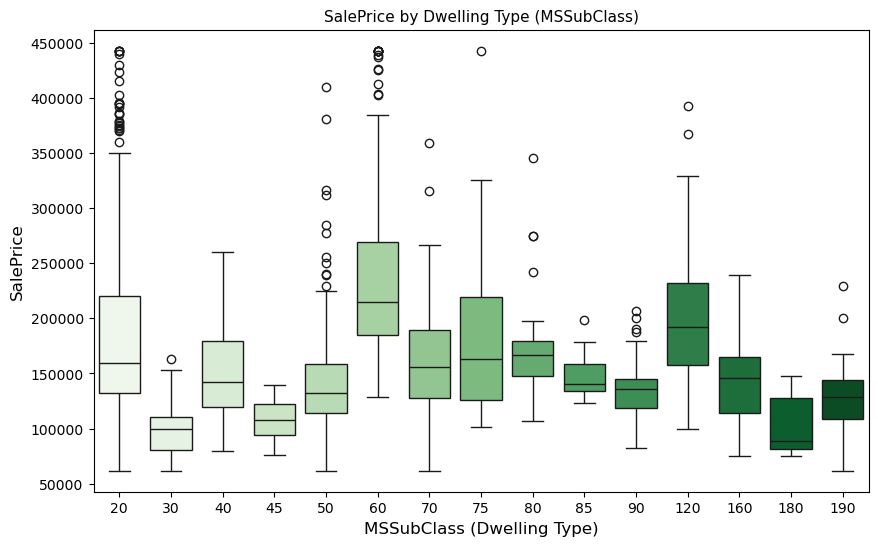

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='MSSubClass', y='SalePrice', data=dataset, palette='Greens')
plt.title('SalePrice by Dwelling Type (MSSubClass)', fontsize=11)
plt.xlabel('MSSubClass (Dwelling Type)', fontsize=12)
plt.ylabel('SalePrice', fontsize=12)
plt.show()

This plot reveals that SalePrice varies significantly by dwelling type, with larger, newer, or more luxurious homes (MSSubClass 20, 120) commanding higher prices, while older or less desirable homes (MSSubClass 30, 45) tend to have lower sale prices.

#### Q10. How does the presence of a garage affect SalePrice?

C:\Users\91706\AppData\Local\Temp\ipykernel_11420\3720502678.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='GarageType', y='SalePrice', data=dataset, palette='Blues')


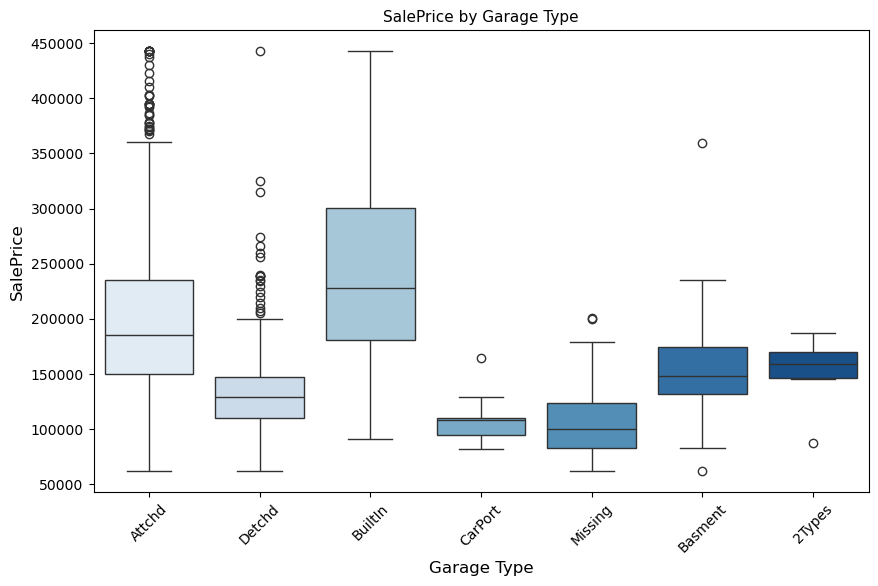

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='GarageType', y='SalePrice', data=dataset, palette='Blues')
plt.title('SalePrice by Garage Type', fontsize=11)
plt.xlabel('Garage Type', fontsize=12)
plt.ylabel('SalePrice', fontsize=12)
plt.xticks(rotation=45)
plt.show()

This plot will shows that houses with attached, detached, or no garages have a significant difference in sale prices. Houses with attached and built-in garages tend to have higher sale prices than those without.

#### Q11. Does the number of bathrooms (FullBath) impact SalePrice?

C:\Users\91706\AppData\Local\Temp\ipykernel_11420\2660550934.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='FullBath', y='SalePrice', data=dataset, palette='cool')


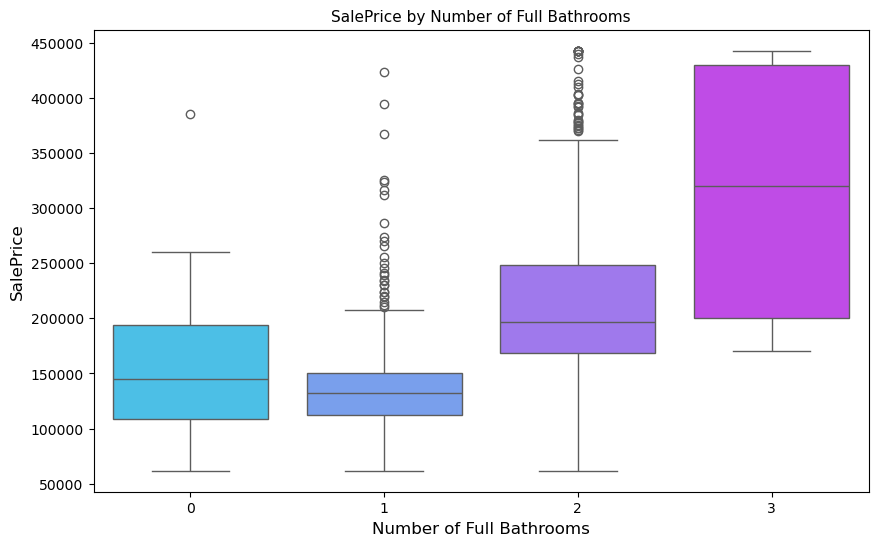

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='FullBath', y='SalePrice', data=dataset, palette='cool')
plt.title('SalePrice by Number of Full Bathrooms', fontsize=11)
plt.xlabel('Number of Full Bathrooms', fontsize=12)
plt.ylabel('SalePrice', fontsize=12)
plt.show()

Homes with more full bathrooms have higher sale prices, but it might plateau after a certain number of bathrooms, as is the case with number of bedrooms.

#### Q12. What is the relationship between house style (HouseStyle) and SalePrice?

C:\Users\91706\AppData\Local\Temp\ipykernel_11420\698727200.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HouseStyle', y='SalePrice', data=dataset, palette='Greens')


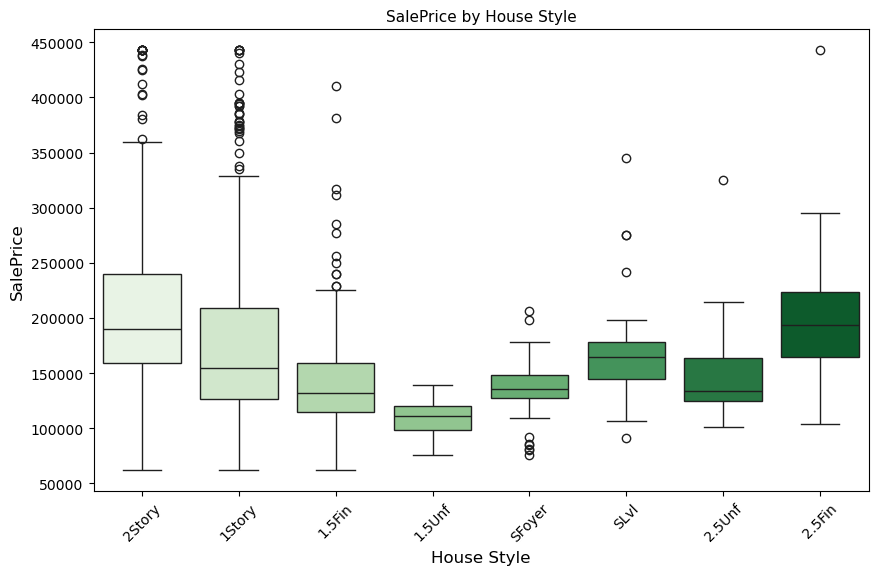

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='HouseStyle', y='SalePrice', data=dataset, palette='Greens')
plt.title('SalePrice by House Style', fontsize=11)
plt.xlabel('House Style', fontsize=12)
plt.ylabel('SalePrice', fontsize=12)
plt.xticks(rotation=45)
plt.show()

Different house styles (like 1-Story, 2-Story, Split-level, etc.) affect sale prices. More modern or larger styles, such as 2-Story, command higher prices.

#### Q13. How do Fireplaces impact house prices?

C:\Users\91706\AppData\Local\Temp\ipykernel_11420\392436968.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Fireplaces', y='SalePrice', data=dataset, palette='Blues')


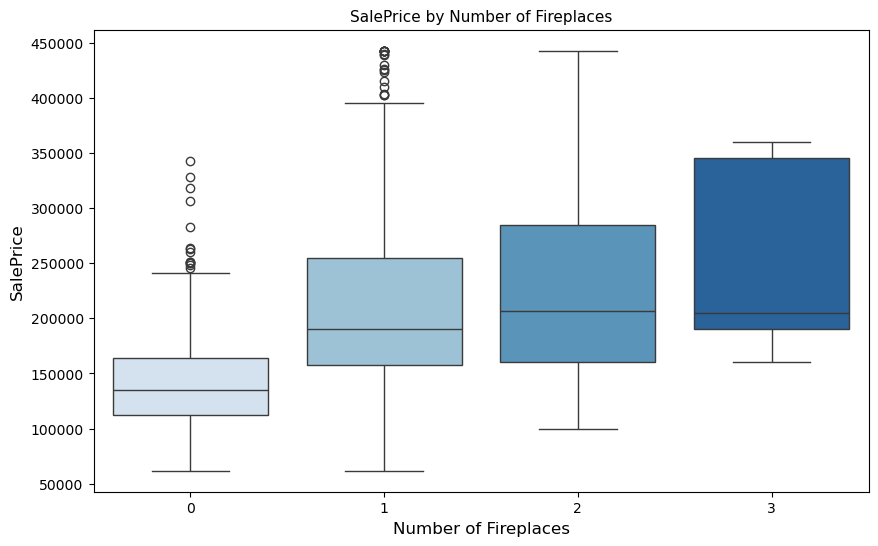

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fireplaces', y='SalePrice', data=dataset, palette='Blues')
plt.title('SalePrice by Number of Fireplaces', fontsize=11)
plt.xlabel('Number of Fireplaces', fontsize=12)
plt.ylabel('SalePrice', fontsize=12)
plt.show()

Homes with one or more fireplaces are considered more luxurious, and their prices are higher. This might also depict declining marginal utility with additional fireplaces.

#### Q14. What is the effect of exterior material (Exterior1st) on house prices?

C:\Users\91706\AppData\Local\Temp\ipykernel_11420\107673965.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exterior1st', y='SalePrice', data=dataset, palette='cool')


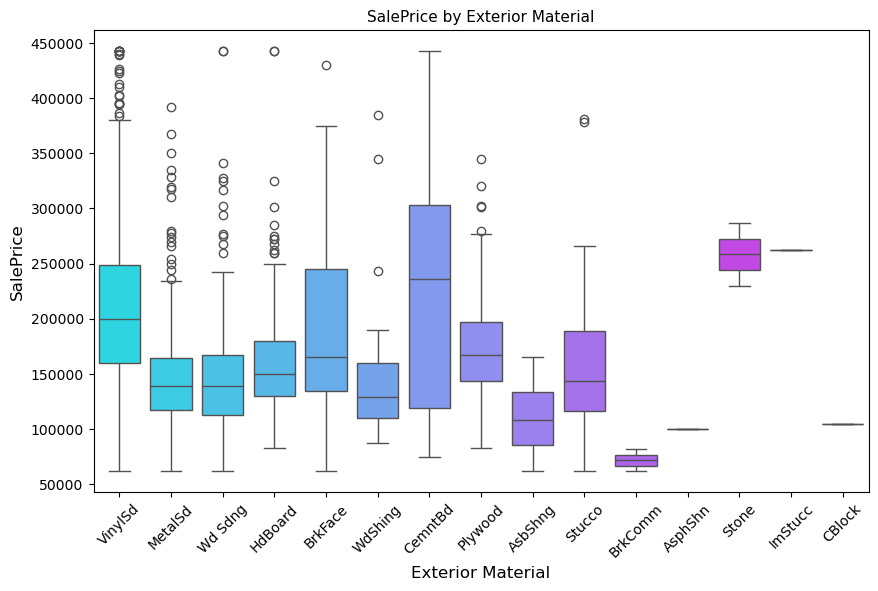

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exterior1st', y='SalePrice', data=dataset, palette='cool')
plt.title('SalePrice by Exterior Material', fontsize=11)
plt.xlabel('Exterior Material', fontsize=12)
plt.ylabel('SalePrice', fontsize=12)
plt.xticks(rotation=45)
plt.show()

There is a difference in sale prices based on the type of exterior material used (e.g., Vinyl, Brick, Stone). Some materials increase house prices due to better insulation, aesthetics, or durability.

#### Q15. What is the relationship between SaleCondition and SalePrice?

C:\Users\91706\AppData\Local\Temp\ipykernel_11420\3621723658.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='SaleCondition', y='SalePrice', data=dataset, palette='Greens')


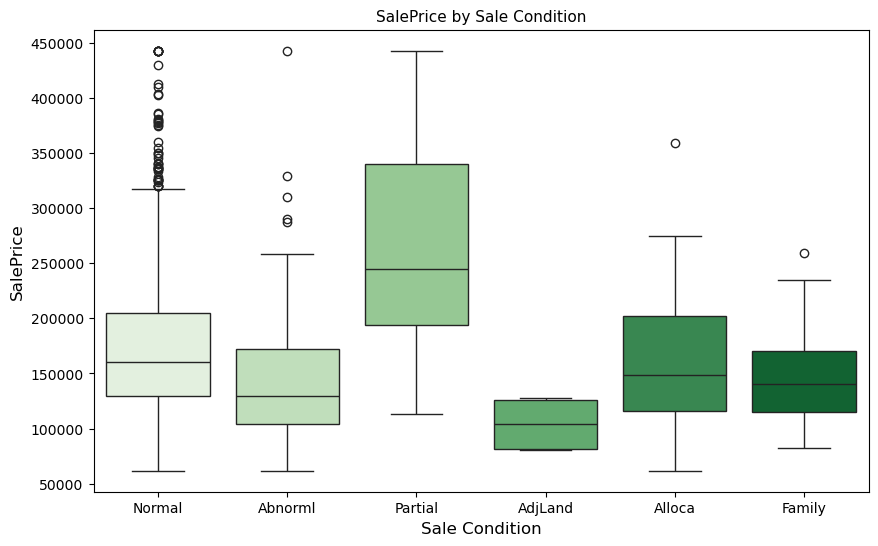

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='SaleCondition', y='SalePrice', data=dataset, palette='Greens')
plt.title('SalePrice by Sale Condition', fontsize=11)
plt.xlabel('Sale Condition', fontsize=12)
plt.ylabel('SalePrice', fontsize=12)
plt.show()

This plot shows if sales conditions (Normal, Abnormal, or Partial) affect prices. Properties sold under forced sale conditions (abnormal) are usually priced lower than those under normal conditions.

#### Q16. Do houses with a basement (BsmtQual) sell for more?

C:\Users\91706\AppData\Local\Temp\ipykernel_11420\2342486518.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='BsmtQual', y='SalePrice', data=dataset, palette='Blues')


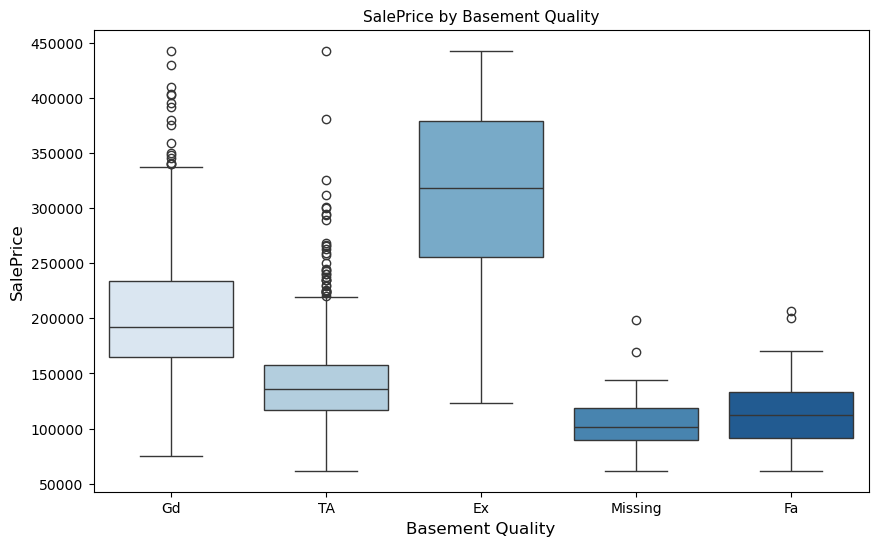

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='BsmtQual', y='SalePrice', data=dataset, palette='Blues')
plt.title('SalePrice by Basement Quality', fontsize=11)
plt.xlabel('Basement Quality', fontsize=12)
plt.ylabel('SalePrice', fontsize=12)
plt.show()

Homes with high-quality basements command higher prices than missing ones.

#### Q17. How does the house's age (YearBuilt) combined with sale condition (SaleCondition) affect SalePrice?

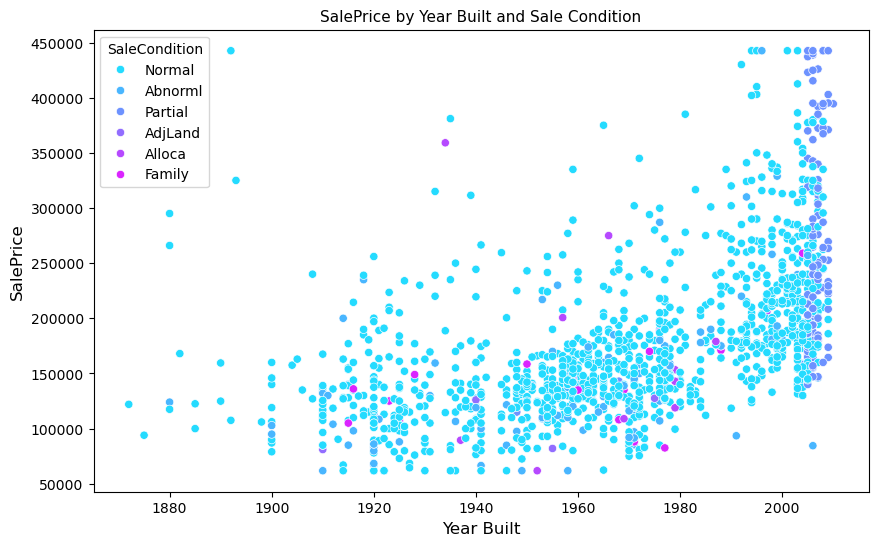

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='YearBuilt', y='SalePrice', hue='SaleCondition', data=dataset, palette='cool')
plt.title('SalePrice by Year Built and Sale Condition', fontsize=11)
plt.xlabel('Year Built', fontsize=12)
plt.ylabel('SalePrice', fontsize=12)
plt.show()

This scatter plot shows how the year the house was built and the sale condition together impact sale prices. It can be observed how older homes might be priced lower, especially under abnormal sale conditions.

### Summary of Findings


- **SalePrice Distribution:** House prices are positively skewed, with most homes priced under $300,000.
- **Correlation Analysis:** Key features like OverallQuFireplacesArea, and GarageCars have strong positive correlations with SalePrice.
- **Location and Price:** Certain neighborhoods have significantly higher house prices, reflecting the premium associated with location.
- **Quality and Price:** Higher quality materials, larger house sizes, and more modern constructions (e.g., newer homes) lead to higher prices.
- **Features like Garages and Fireplaces:** Homes with attached garages or multiple fireplaces command higher prices.
- **Condition of Sale:** Properties sold under abnormal or forced sale conditions tend to have lowerpices.


These insights will help potential buyers, sellers, and developers understand the primary drivers of housing prices, allowing for more informed decision-making in the real estate market.